## Paso 1: Importar las bibliotecas

In [1]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import warnings
warnings.filterwarnings("ignore")

## Paso 2: Leer datos de existencias

In [3]:
df = pd.read_csv('RELIANCE.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-18,1949.099976,1997.000000,1923.349976,1983.949951,1977.588257,16198856
1,2021-01-19,1994.650024,2031.000000,1994.650024,2016.400024,2009.934204,14771048
2,2021-01-20,2021.400024,2058.000000,2001.400024,2054.699951,2048.111328,14271669
3,2021-01-21,2082.000000,2120.000000,2075.000000,2099.399902,2092.667969,18038987
4,2021-01-22,2111.000000,2115.350098,2035.150024,2049.600098,2043.027832,14090818
...,...,...,...,...,...,...,...
244,2022-01-12,2471.300049,2524.949951,2465.000000,2521.100098,2521.100098,6830402
245,2022-01-13,2521.250000,2541.000000,2508.399902,2535.300049,2535.300049,5471871
246,2022-01-14,2535.000000,2567.300049,2525.850098,2539.000000,2539.000000,9197773
247,2022-01-17,2538.000000,2565.000000,2537.000000,2552.250000,2552.250000,3708822


## Paso 3: Preparación de datos 

In [4]:
df.index = pd.to_datetime(df['Date'])
df

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2021-01-18,2021-01-18,1949.099976,1997.000000,1923.349976,1983.949951,1977.588257,16198856
2021-01-19,2021-01-19,1994.650024,2031.000000,1994.650024,2016.400024,2009.934204,14771048
2021-01-20,2021-01-20,2021.400024,2058.000000,2001.400024,2054.699951,2048.111328,14271669
2021-01-21,2021-01-21,2082.000000,2120.000000,2075.000000,2099.399902,2092.667969,18038987
2021-01-22,2021-01-22,2111.000000,2115.350098,2035.150024,2049.600098,2043.027832,14090818
...,...,...,...,...,...,...,...
2022-01-12,2022-01-12,2471.300049,2524.949951,2465.000000,2521.100098,2521.100098,6830402
2022-01-13,2022-01-13,2521.250000,2541.000000,2508.399902,2535.300049,2535.300049,5471871
2022-01-14,2022-01-14,2535.000000,2567.300049,2525.850098,2539.000000,2539.000000,9197773


In [5]:
df = df.drop(['Date'], axis='columns')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-18,1949.099976,1997.000000,1923.349976,1983.949951,1977.588257,16198856
2021-01-19,1994.650024,2031.000000,1994.650024,2016.400024,2009.934204,14771048
2021-01-20,2021.400024,2058.000000,2001.400024,2054.699951,2048.111328,14271669
2021-01-21,2082.000000,2120.000000,2075.000000,2099.399902,2092.667969,18038987
2021-01-22,2111.000000,2115.350098,2035.150024,2049.600098,2043.027832,14090818
...,...,...,...,...,...,...
2022-01-12,2471.300049,2524.949951,2465.000000,2521.100098,2521.100098,6830402
2022-01-13,2521.250000,2541.000000,2508.399902,2535.300049,2535.300049,5471871
2022-01-14,2535.000000,2567.300049,2525.850098,2539.000000,2539.000000,9197773


## Paso 4: Definir las variables explicativas

In [6]:
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low
X = df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2021-01-18,-34.849975,73.650024
2021-01-19,-21.750000,36.349976
2021-01-20,-33.299927,56.599976
2021-01-21,-17.399902,45.000000
2021-01-22,61.399902,80.200074


## Paso 5: Definir la variable objetivo

In [7]:
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0])

## Paso 6: dividir los datos en entrenar y probar

In [8]:
split_percentage = 0.8
split = int(split_percentage*len(df))
  
# Train data set
X_train = X[:split]
y_train = y[:split]
  
# Test data set
X_test = X[split:]
y_test = y[split:]

## Paso 7: Clasificador de vectores de soporte (SVC)

In [9]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)

## Paso 8: Implementación de la estrategia

In [10]:
df['Predicted_Signal'] = cls.predict(X)

In [11]:
# Calculate daily returns
df['Return'] = df.Close.pct_change()

In [12]:
# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)

In [13]:
# Calculate Cumulutive returns
df['Cum_Ret'] = df['Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,,
2021-01-18,1949.099976,1997.000000,1923.349976,1983.949951,1977.588257,16198856,-34.849975,73.650024,1,NaN,NaN,NaN
2021-01-19,1994.650024,2031.000000,1994.650024,2016.400024,2009.934204,14771048,-21.750000,36.349976,1,0.016356,0.016356,0.016356
2021-01-20,2021.400024,2058.000000,2001.400024,2054.699951,2048.111328,14271669,-33.299927,56.599976,1,0.018994,0.018994,0.035351
2021-01-21,2082.000000,2120.000000,2075.000000,2099.399902,2092.667969,18038987,-17.399902,45.000000,1,0.021755,0.021755,0.057105
2021-01-22,2111.000000,2115.350098,2035.150024,2049.600098,2043.027832,14090818,61.399902,80.200074,1,-0.023721,-0.023721,0.033385
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-12,2471.300049,2524.949951,2465.000000,2521.100098,2521.100098,6830402,-49.800049,59.949951,1,0.026695,0.026695,0.271778
2022-01-13,2521.250000,2541.000000,2508.399902,2535.300049,2535.300049,5471871,-14.050049,32.600098,1,0.005632,0.005632,0.277410
2022-01-14,2535.000000,2567.300049,2525.850098,2539.000000,2539.000000,9197773,-4.000000,41.449951,1,0.001459,0.001459,0.278869


In [14]:
# Plot Strategy Cumulative returns 
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
2021-01-18,1949.099976,1997.000000,1923.349976,1983.949951,1977.588257,16198856,-34.849975,73.650024,1,NaN,NaN,NaN,NaN
2021-01-19,1994.650024,2031.000000,1994.650024,2016.400024,2009.934204,14771048,-21.750000,36.349976,1,0.016356,0.016356,0.016356,0.016356
2021-01-20,2021.400024,2058.000000,2001.400024,2054.699951,2048.111328,14271669,-33.299927,56.599976,1,0.018994,0.018994,0.035351,0.035351
2021-01-21,2082.000000,2120.000000,2075.000000,2099.399902,2092.667969,18038987,-17.399902,45.000000,1,0.021755,0.021755,0.057105,0.057105
2021-01-22,2111.000000,2115.350098,2035.150024,2049.600098,2043.027832,14090818,61.399902,80.200074,1,-0.023721,-0.023721,0.033385,0.033385
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-12,2471.300049,2524.949951,2465.000000,2521.100098,2521.100098,6830402,-49.800049,59.949951,1,0.026695,0.026695,0.271778,0.336765
2022-01-13,2521.250000,2541.000000,2508.399902,2535.300049,2535.300049,5471871,-14.050049,32.600098,1,0.005632,0.005632,0.277410,0.342398
2022-01-14,2535.000000,2567.300049,2525.850098,2539.000000,2539.000000,9197773,-4.000000,41.449951,1,0.001459,0.001459,0.278869,0.343857


## Devoluciones de la estrategia de trama frente a las devoluciones originales

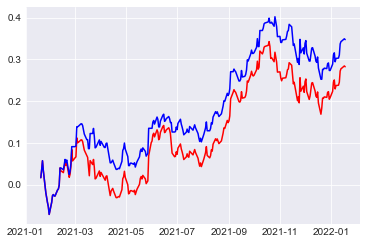

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
  
plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')